In [ ]:
# Update sklearn to prevent version mismatches
#!pip install sklearn --upgrade

In [ ]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
#!pip install joblib

In [21]:
import sys 
import os
import numpy as np
import xgboost
#from sklearn import cross_validation
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Import widget functionality

from ipywidgets import *

In [2]:
import pandas as pd
import numpy as np
import math 

# Read the CSV and Perform Basic Data Cleaning

In [4]:
df = pd.read_csv("./Resources/Data/winequality-white-clean.csv", delimiter=',')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,Fair
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,Fair
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,Fair
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,Fair
4,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,Fair
...,...,...,...,...,...,...,...,...,...,...,...,...
3952,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,Fair
3953,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,Fair
3954,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,Fair
3955,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,Very Good


# Select your features (columns)

In [5]:
# Set features. This will also be used as your x values.
X = df.drop(['quality'], axis = 1)
X


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6
...,...,...,...,...,...,...,...,...,...,...,...
3952,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
3953,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
3954,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
3955,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [6]:
y = df['quality']
y

0            Fair
1            Fair
2            Fair
3            Fair
4            Fair
          ...    
3952         Fair
3953         Fair
3954         Fair
3955    Very Good
3956         Fair
Name: quality, Length: 3957, dtype: object

# Create a Train Test Split


In [63]:
#from sklearn.ensemble import ExtraTreesClassifier
#white_dl_model = ExtraTreesClassifier()
#white_dl_model.fit(X, y)
#print(white_dl_model.feature_importances_)
#feat_importances = pd.Series(white_dl_model.feature_importances_, index=X_names)
##feat_importances.nlargest(10).plot(kind= "barh" , color = "#EEEDC4")
#plt.show()

In [7]:
# Split the data using train_test_split


from sklearn.model_selection import train_test_split
X_train, X_, y_train, y_ = train_test_split(X,y,train_size=.7,random_state=3)
X_val,X_test, y_val, y_test = train_test_split(X_,y_,train_size=.7,random_state=3)
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape



((2769, 11), (831, 11), (357, 11), (2769,), (831,), (357,))

In [8]:
# Train the model - in Jupyter this will also print the model parameters
#model = XGBClassifier(max_depth=3,learning_rate=.7)
#cpu_dict = { 'objective':'reg:squarederror'}
#model = xgboost.XGBClassifier(max_depth=3,learning_rate=.7)
model= xgboost.XGBClassifier(
    learning_rate=0.2,
    n_estimators=1000,
    max_depth=5,
    min_child_weight=1.0,
    gamma=10,
    subsample=0.2,
    colsample_bytree=0.8,
    objective='multi:softmax',
    nthread=4,
    scale_pos_weight=1.0,
    seed=27,
    num_class=2,
    )
model

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=0.8, gamma=10,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=0.2, max_delta_step=None, max_depth=5,
              min_child_weight=1.0, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, nthread=4, num_class=2,
              num_parallel_tree=None, objective='multi:softmax',
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=1.0, seed=27, subsample=0.2, tree_method=None,
              use_label_encoder=True, validate_parameters=None, ...)

In [10]:
model = model.fit(X_train, y_train)
model.score(X_train, y_train)
#model = xgboost.XGBClassifier(use_label_encoder=False)
#model.fit(X_train, y_train)

[17:41:07] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:41:07] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8208739617190322

In [11]:
model.score(X_val, y_val)

0.8219013237063778

In [13]:
best_model = model
best_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=10, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=5,
              min_child_weight=1.0, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=4, nthread=4, num_class=2,
              num_parallel_tree=1, objective='multi:softmax', random_state=27,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1.0, seed=27,
              subsample=0.2, tree_method='exact', use_label_encoder=True,
              validate_parameters=1, ...)

In [14]:
#Concatenate train and validation set
X_train = pd.concat([X_train, X_val], ignore_index=True)
y_train = pd.concat([y_train, y_val], ignore_index=True)
best_model.fit(X_train, y_train)
print(best_model.score(X_train,y_train), best_model.score(X_val,y_val))

[17:47:36] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:47:36] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8345745881290905 0.8471720818291215


In [15]:
print(f'Final result {best_model.score(X_test,y_test)}')

Final result 0.8067226890756303


In [16]:
# make predictions for test data
predictions = model.predict(X_test)
actual = y_test.tolist()
#y_pred
#predictions = [value for value in y_pred]

In [17]:
# evaluate model's predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 80.67%


In [18]:
# Calculate classification report
y_names = ['Fair','Good']
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=y_names))

              precision    recall  f1-score   support

        Fair       0.83      0.95      0.89       285
        Good       0.55      0.22      0.32        72

    accuracy                           0.81       357
   macro avg       0.69      0.59      0.60       357
weighted avg       0.77      0.81      0.77       357



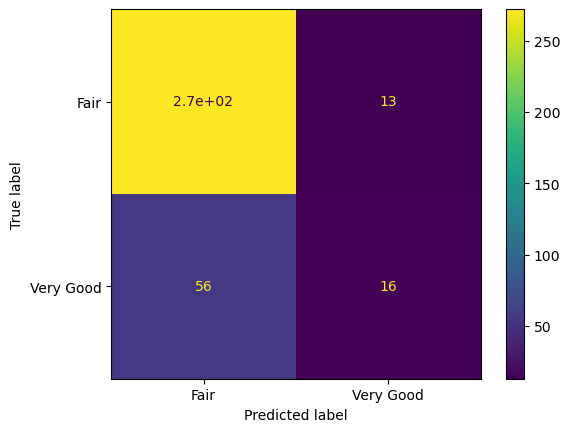

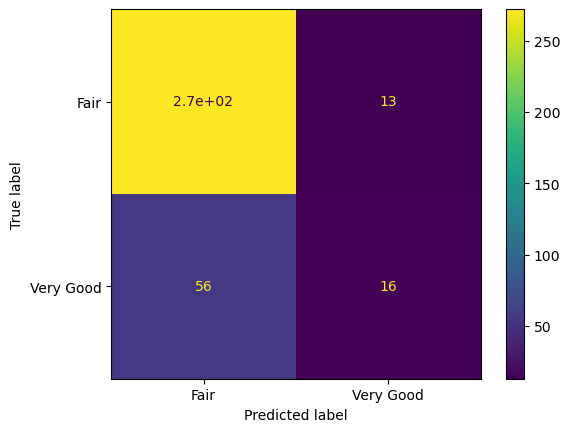

In [22]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test)  

plt.show() 

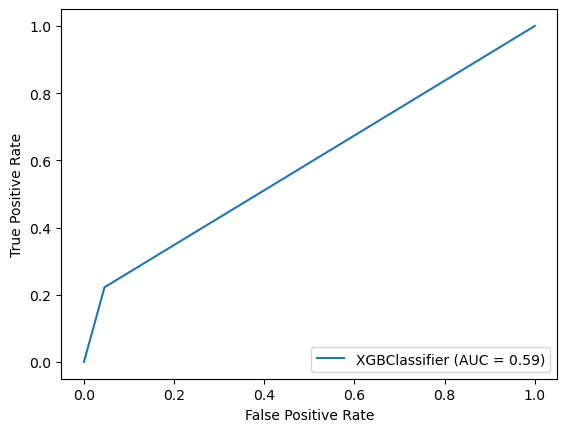

In [24]:
from sklearn.metrics import plot_roc_curve

model_disp = plot_roc_curve(model, X_test, y_test)
plt.show()

In [26]:
# from sklearn import metrics
# metrics.plot_det_curve(rf, X_test, y_test)  
# plt.show()     

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [ ]:
# Create the GridSearchCV model

# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators':[100, 200, 300], 'random_state':[0,1,2,3], 'max_depth': [None,1,2,3,4,max_features]  }
    
grid = GridSearchCV(model, param_grid, verbose=3, return_train_score=True)


In [ ]:
# Train the model with GridSearch
grid.fit(X_train, y_train)

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

In [ ]:
best_rf = grid.best_estimator_
best_rf

In [ ]:
X_train = pd.concat([X_train, X_val], ignore_index=True)
y_train = pd.concat([y_train, y_val], ignore_index=True)
best_rf.fit(X_train, y_train)
print(best_rf.score(X_train,y_train), best_rf.score(X_val,y_val))